In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_provided_solution(solution, title, nodes, costs, plot_path, node_size=30):
    x_coords = [nodes[node][0] for node in solution]
    y_coords = [nodes[node][1] for node in solution]
    print(x_coords)


    x_nodes = [nodes[node][0] for node in nodes]
    y_nodes = [nodes[node][1] for node in nodes]

    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])
    normalized_costs = [(cost - min(costs)) / (max(costs) - min(costs)) for cost in costs]
    cmap = plt.get_cmap('inferno')

    plt.figure(figsize=(6, 5)) 
    plt.scatter(x_nodes, y_nodes, s=node_size, c=normalized_costs, cmap=cmap, marker='o', label='All nodes')
    plt.plot(x_coords, y_coords, linestyle='-', markersize=5, color='tan', label='Selected path')


    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(title)
    plt.legend()
    # plt.xlim(0, 4100)
    # plt.ylim(0, 2100)
    cbar = plt.colorbar()
    cbar.set_label('Normalized Cost')
    plt.savefig(plot_path, dpi=300)
    return plt

In [3]:
def generate_plots_from_results(output = "results.txt", plot_path = "./plots/"):
    with open("results.txt") as f:
        file = f.readlines()
    results = {}
    current_algorithm = None
    for line in file:
        if "#Algorithm" in line:
            current_algorithm = line.split(":")[1].strip()
            results[current_algorithm] = {}
            continue
        if "##File" in line:
            file_n = line.split("/")[-1].strip()
            results[current_algorithm][file_n[:-4]] = []
            continue
        if "Best" in line or "Worst" in line or "Average" in line:
            continue
        if ord(line[0]) in range(48, 58):
            results[current_algorithm][file_n] = [int(i) for i in line.split()]
    for i, algorithm in enumerate(results.keys()):
        for j, instance in enumerate(results[algorithm].keys()):
            print(algorithm, instance)
            df = pd.read_csv(f"./data/{instance}.csv", delimiter=';', names=['x', 'y', 'cost'])
            nodes = {i: (df.x[i], df.y[i]) for i in range(len(df))}
            costs = list(df.cost)
            solution = results[algorithm][instance]
            ax = plot_provided_solution(solution, algorithm, nodes, costs, f"{plot_path + algorithm}_{instance}_best.png")
    plt.show()

In [4]:
generate_plots_from_results()

Greedy2Regret TSPA


IndexError: list index out of range

Random search TSPA
Random search TSPB
Random search TSPC
Random search TSPD
Nearest Neighbour TSPA
Nearest Neighbour TSPB
Nearest Neighbour TSPC
Nearest Neighbour TSPD
Greedy Cycle TSPA
Greedy Cycle TSPB
Greedy Cycle TSPC
Greedy Cycle TSPD


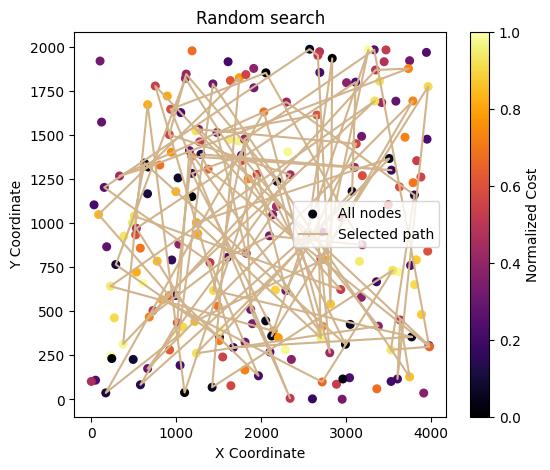

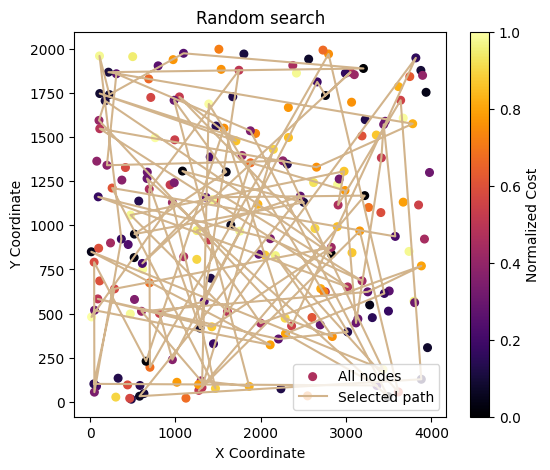

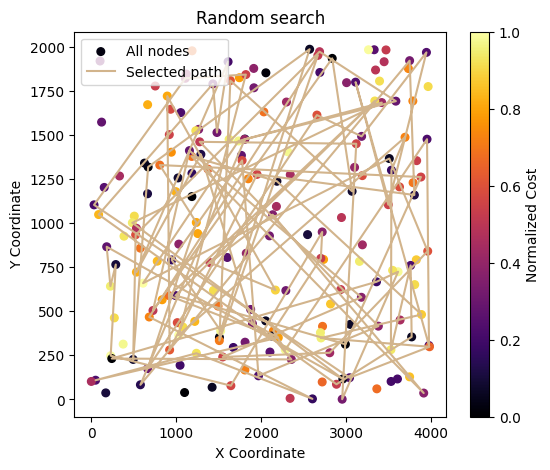

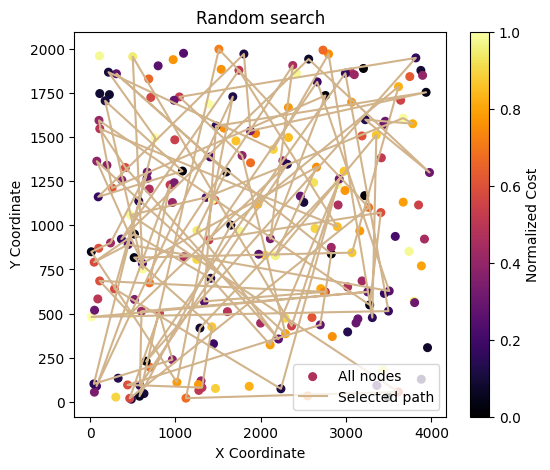

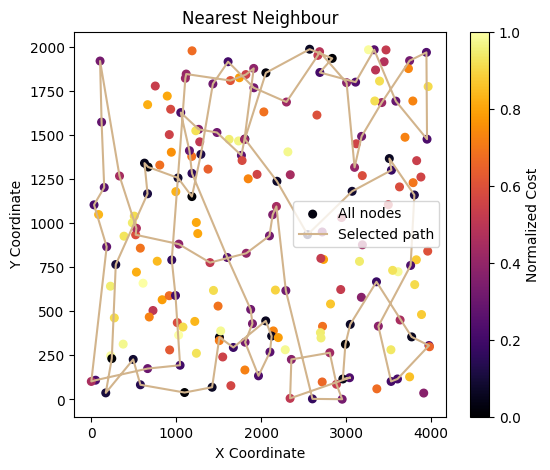

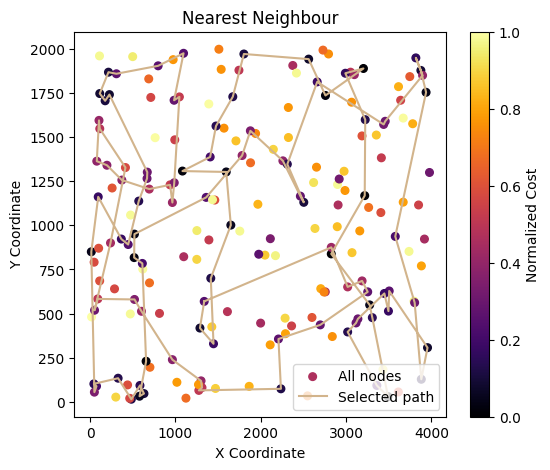

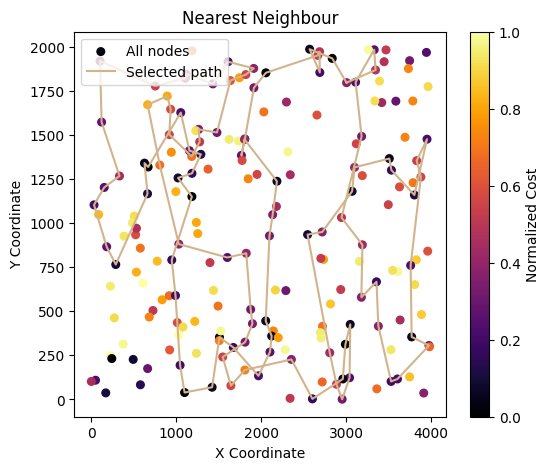

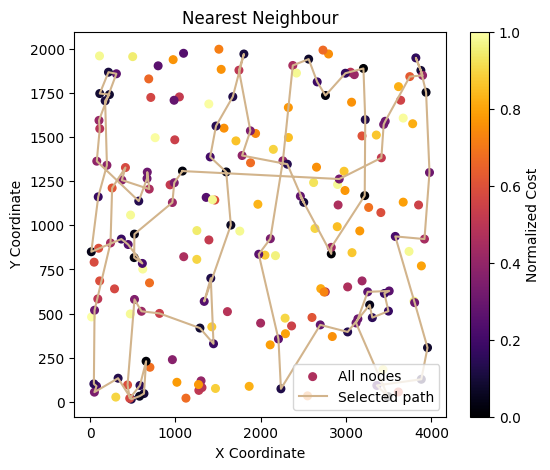

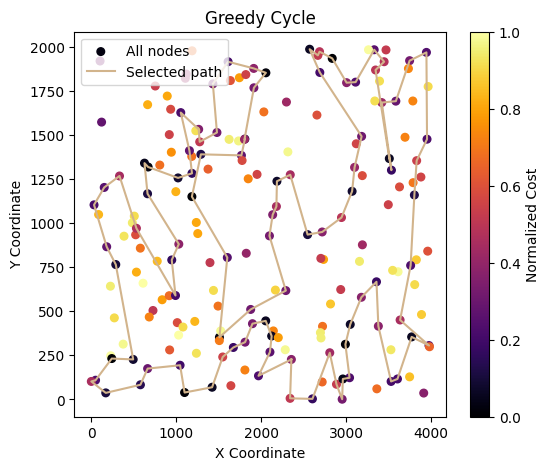

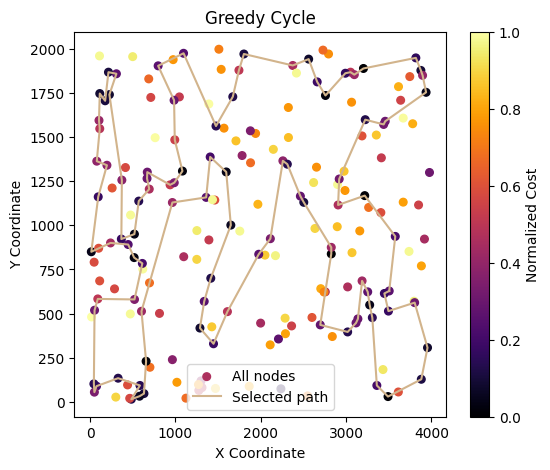

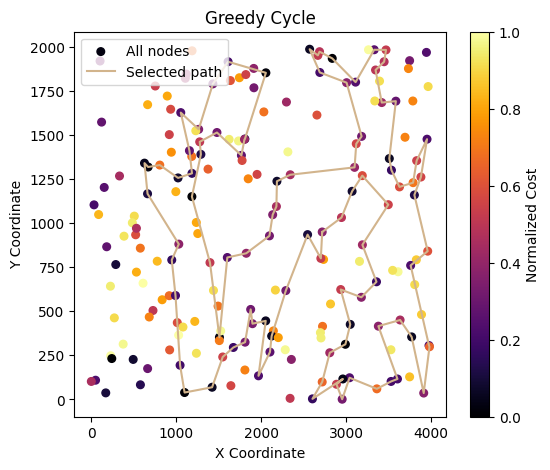

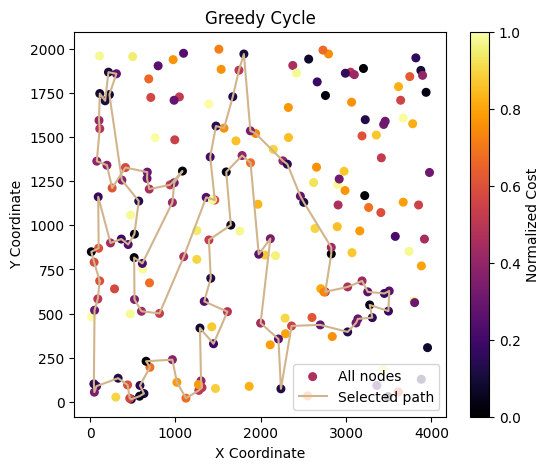

In [5]:
import csv
from IPython.display import clear_output

def animate_provided_solution(title, nodes):
  for i in range(2, 101):
    solution = [int(x[0]) for x in csv.reader(open(f'animation_greedy_instance_A/{i}.csv'))]
    x_coords = [nodes[node][0] for node in solution]
    y_coords = [nodes[node][1] for node in solution]

    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])

    plt.scatter(x_coords, y_coords, c='red', marker='o', label='Selected Nodes')

    plt.plot(x_coords, y_coords, linestyle='-', marker='o', markersize=5, color='blue', label='Path')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(title)
    plt.legend()
    plt.xlim(0, 4300)
    plt.ylim(0, 2200)
    clear_output(wait=True)
    plt.show()

animate_provided_solution("Greedy cycle", nodes)

KeyboardInterrupt: 